<a href="https://colab.research.google.com/github/Ford-z/Machine-Learning/blob/master/Cluster/K_means/Quiz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $k$-Means on quiz4

In this notebook we will investigate whether the $k$-means algorithm can be used to identify clusters in the MNIST dataset that correspond to the digit classes. If you are using your own installation of Jupyter you will need the mnist package which can be installed through anaconda using

conda install -c conda-forge mnist

I must point out that no efforts have been made to optimise this code for either efficiency or elegance, and some of you will no doubt be able to find ways in which it could be improved.

**CAUTION** these notebooks are great, but you must be careful when running the cells out of order, especially if you are using mutable variables

In [0]:
!pip install -q mnist # this line instructs colab to install mnist
import matplotlib.pyplot as plt
import mnist
import numpy as np
from numpy.linalg import inv, det
import pandas as pd
from google.colab import files

In [0]:
# Get the training and test data
uploaded = files.upload()

Saving assignment4-q3.csv to assignment4-q3 (1).csv


In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# 指定Google Drive云端硬盘的根目录，名为drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
df = pd.DataFrame(pd.read_csv('drive/assignment4-q3.csv',header=None))
print(df)

             0         1         2         3         4
0    -6.600441  0.753869 -0.246816  0.068788  0.322577
1    -3.654231  0.325552 -0.269918 -0.876327 -1.425211
2    -0.647433 -5.374509  0.444086  0.864371  5.073218
3     0.250021  3.428828 -0.403042 -4.269514 -0.469498
4     5.401426 -0.217909  0.606282  0.864640 -3.294026
...        ...       ...       ...       ...       ...
9995 -0.267487 -5.707709  1.520693  0.317077  5.903460
9996  0.137246  5.698536  0.756645 -5.568357  1.546414
9997  0.495448 -6.344917 -0.844630 -0.451231  5.497714
9998 -4.004405  0.157959  0.834499 -0.943384 -0.067830
9999 -4.425379  0.786903  0.273073  1.310924 -0.068100

[10000 rows x 5 columns]


## Do the clustering with k-means

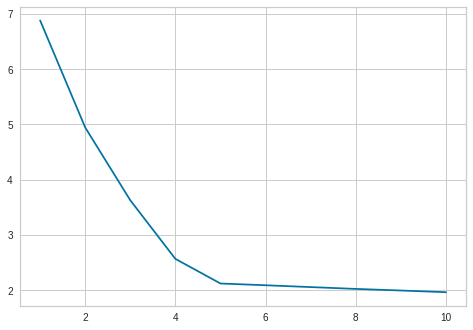

In [28]:
data=df.values
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
sse = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(data)
    kmeans.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

plt.plot(K, distortions, 'bx-')

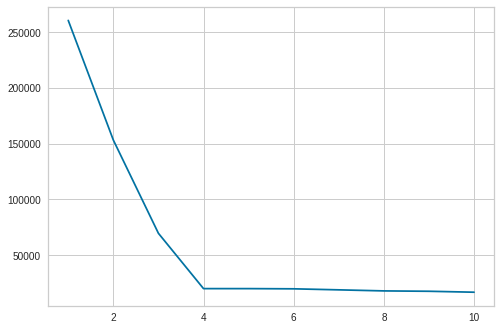

In [31]:
from sklearn.cluster import KMeans
sse = []
K = range(1,11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(data)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(data)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(data)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (data[i, 0] - curr_center[0]) ** 2 + (data[i, 1] - curr_center[1]) ** 2

    sse.append(curr_sse)
plt.plot(K,sse)

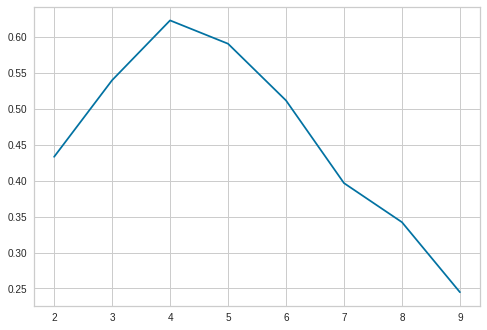

In [30]:
from sklearn.metrics import silhouette_score
sil = []
K = range(2,10)
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))

plt.plot(K,sil)

In [0]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f73eb7dd2b0>,
                 k=None, metric=None, model=None, timings=True)

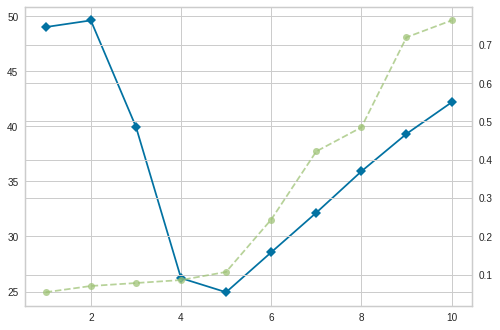

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(data)

In [12]:
kmeans = KMeans(n_clusters = 5).fit(data)
kmeans.cluster_centers_

array([[-9.29328718e-03, -4.97572105e+00, -1.28653231e-02,
        -5.01817301e+00,  5.00746739e+00],
       [ 5.02923153e+00,  3.20977961e-02, -3.55040211e-03,
        -3.27914208e-02, -4.96644978e+00],
       [-2.72900657e-03,  5.01611084e+00, -1.44366549e-02,
        -5.00974530e+00,  9.64629268e-03],
       [-4.98030028e+00,  3.31179305e-02, -1.97494715e-02,
         8.75357423e-03,  6.73770375e-03],
       [-8.47841228e-03, -5.00203202e+00,  3.15907356e-02,
        -4.20789150e-03,  5.02588324e+00]])